In [17]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
from array import array
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);
#numpy
import numpy as np


### Get Data and MC files

In [18]:
#pPb
#MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV20GeV_100Kevents_noNormalize.root'#actually 1 Gev tp 30 Gev
#MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV30GeV_10Mevents_noNormalize.root'
#MCfile_name = '/home/dhruv/13b2_16_21bins_1GeV30GeV_10Mevents_noNormalize_allReco.root'
MCfile_name = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_noNormalize_allReco.root'

#Datafile_name = '/home/dhruv/fout_16_13b_1GeV16GeV_tracking_addedPileUp.root'
#Datafile_name = '/home/dhruv/fout_16_13b_3run_1GeV16GeV_tracking_addedPileUp_1Mevents.root'
#Datafile_name = '/home/dhruv/fout_16_13b_1GeV16GeV_tracking_noPileUp.root'
#Datafile_name = '/home/dhruv/fout_16_13b_3run_pPb_1GeV30GeV_trig_pileup_4lL.root'
#Datafile_name = '/home/dhruv/fout_16_21bins_13b_1GeV30GeV_tracking_addedPileUp_trigCut_10Mevents_noNormalize.root'
#Datafile_name = '/home/dhruv/fout_16_51bins_13b_publishedBinning15GeV_tracking_addedPileUp_trigCut_1Mevents_noNormalize.root'
Datafile_name = '/home/dhruv/fout_16_51bins_13b_3run_new_pPbpublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root'

MCfile = ROOT.TFile(MCfile_name)
Datafile = ROOT.TFile(Datafile_name)

## Data: measured and published spectra

### Measured data

519699.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


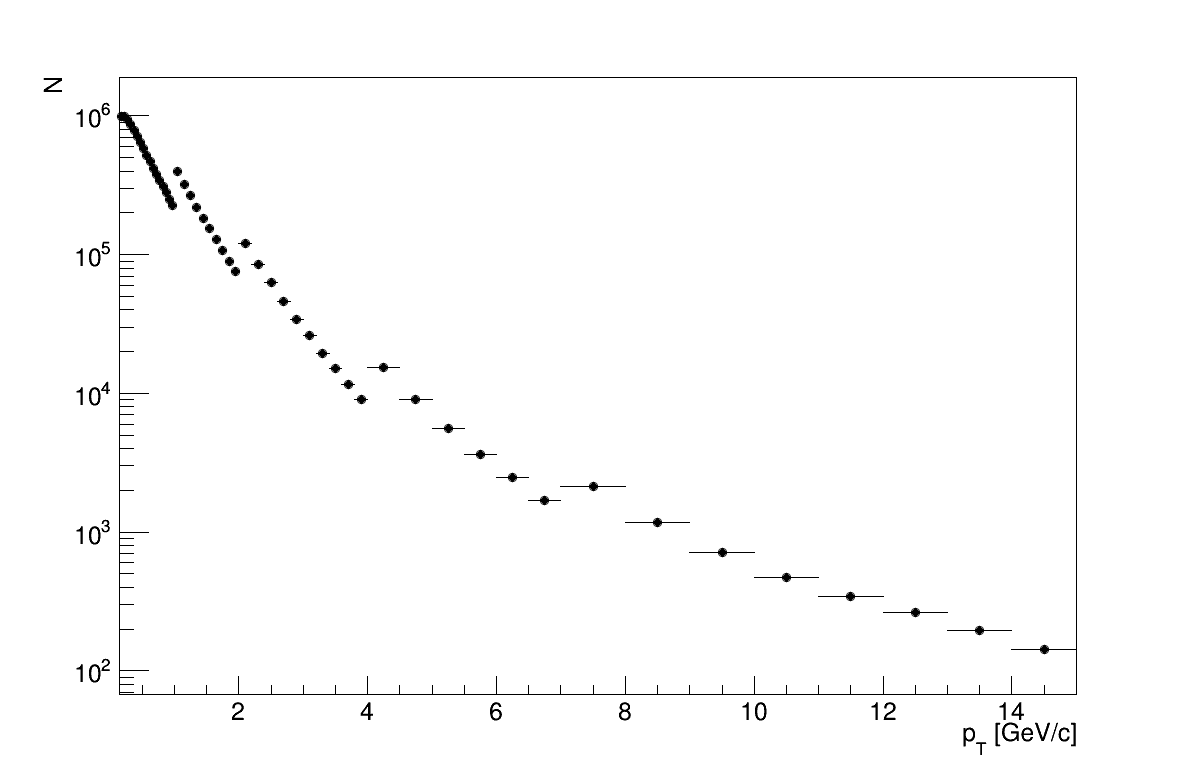

In [19]:
#data = MCfile.Get('hReco_all')

data = Datafile.Get('hReco')
#data.ClearUnderflowAndOverflow()
data.SetLineColor(ROOT.kBlack)
data.SetMarkerColor(ROOT.kBlack)
data.SetMarkerStyle(20)
#data.GetXaxis().SetRangeUser(1,20)
data.SetTitle(';p_{T} [GeV/c];N')

normalizer = Datafile.Get('hNormalizer')
numEvents = normalizer.GetBinContent(1)
data.Scale(numEvents)
print numEvents

#data_mc = MCfile.Get('hReco_all')
#data_mc.SetLineColor(ROOT.kBlue)
#data_mc.SetMarkerColor(ROOT.kBlue)
#data_mc.SetMarkerStyle(20)
#data_mc.Scale(data.Integral()/data_mc.Integral())
#print data_mc.Integral()
#print data.Integral()

c = ROOT.TCanvas('c','c',1200,800)
data.Draw()
#data_mc.Draw('same')
ROOT.gPad.SetLogy()
c.Draw()
#c.SaveAs('dataSpectrum_tracking_4Layers_pPb_tpc_all_noZ_13c.png')

### Published Data 

In [20]:
nbinstrack = 21
track_bins = np.array([1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,  10.0, 
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 20.0, 22.0, 24.0,
              26.0, 30.0], dtype='float64')
published_content = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
                              4.52E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04,
                              2.16E-04, 1.39E-04, 9.39E-05, 6.32E-05, 4.53E-05, 
                              5.73E-05, 3.15E-05, 1.89E-05, 1.22E-05, 7.63E-06,
                              7.93E-06], dtype='float64')
published_error = np.array([4.86E-02, 1.08E-02, 2.51E-03, 7.04E-04, 2.16E-04, 
                            9.22E-05, 3.27E-05, 2.61E-05, 2.15E-05, 1.81E-05,
                            1.56E-05, 1.35E-05, 1.20E-05, 1.05E-05, 9.49E-06, 
                            1.13E-05, 9.37E-06, 8.06E-06, 7.12E-06, 6.09E-06, 
                            6.72E-06], dtype='float64')

In [21]:
nbinstrack = 51
track_bins = np.array([0.15,  0.20,  0.25,  0.30,  0.35,  0.40,  0.45,  0.50,  0.55,  0.60,
                       0.65,  0.70,  0.75,  0.80,  0.85,  0.90,  0.95,  1.00,  1.10,  1.20,
                       1.30,  1.40,  1.50,  1.60,  1.70,  1.80,  1.90,  2.00,  2.20,  2.40,
                       2.60,  2.80,  3.00,  3.20,  3.40,  3.60,  3.80,  4.00,  4.50,  5.00,
                       5.50,  6.00,  6.50,  7.00,  8.00,  9.00,  10.00, 11.00, 12.00, 13.00,
                       14.00, 15.00], dtype='float64')
published_content = np.array([1.28E+00, 1.28E+00, 1.23E+00, 1.13E+00, 1.03E+00, 9.27E-01, 8.34E-01, 7.50E-01, 
                              6.74E-01, 6.06E-01, 5.47E-01, 4.93E-01, 4.46E-01, 4.03E-01, 3.65E-01, 3.31E-01, 
                              3.00E-01, 5.20E-01, 4.31E-01, 3.58E-01, 2.98E-01, 2.50E-01, 2.09E-01, 1.75E-01, 
                              1.48E-01, 1.24E-01, 1.05E-01, 1.65E-01, 1.20E-01, 8.75E-02, 6.43E-02, 4.78E-02, 
                              3.58E-02, 2.69E-02, 2.06E-02, 1.58E-02, 1.23E-02, 2.04E-02, 1.15E-02, 6.85E-03, 
                              4.19E-03, 2.72E-03, 1.81E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04, 2.16E-04, 
                              1.39E-04, 9.39E-05, 6.32E-05], dtype='float64')
published_error = np.array([1.43E-04, 1.04E-04, 9.85E-05, 9.28E-05, 8.71E-05, 8.21E-05, 7.91E-05, 7.71E-05, 
                            7.45E-05, 7.22E-05, 7.02E-05, 6.78E-05, 6.54E-05, 6.30E-05, 6.08E-05, 5.85E-05, 
                            5.58E-05, 7.29E-05, 6.56E-05, 5.92E-05, 5.36E-05, 4.89E-05, 4.45E-05, 4.06E-05, 
                            3.71E-05, 3.39E-05, 3.11E-05, 3.89E-05, 3.30E-05, 2.81E-05, 2.40E-05, 2.06E-05, 
                            1.78E-05, 1.53E-05, 1.34E-05, 1.17E-05, 1.03E-05, 1.32E-05, 9.81E-06, 7.56E-06, 
                            5.85E-06, 4.71E-06, 3.84E-06, 4.09E-06, 2.90E-06, 2.15E-06, 1.64E-06, 1.30E-06, 
                            1.04E-06, 8.54E-07, 7.00E-07], dtype='float64')

519699.0
1.6


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


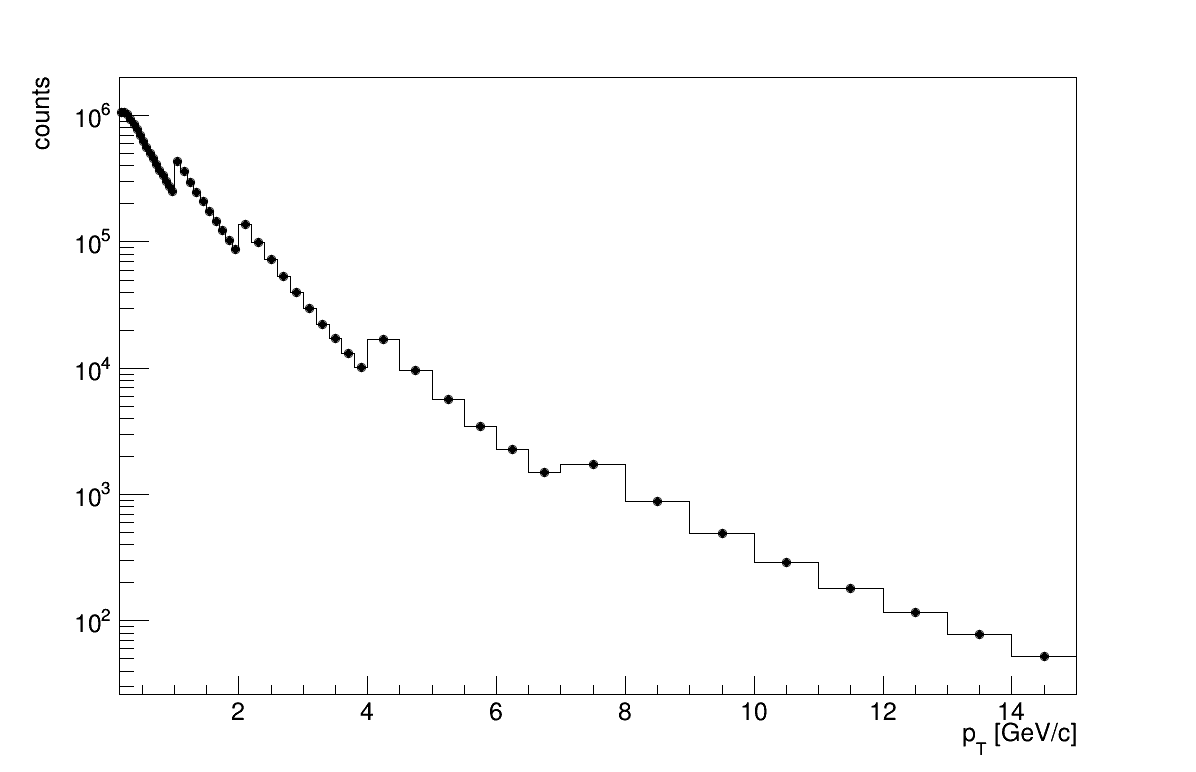

In [22]:

#########################################################################################################################
#########################################################################################################################
#nbinstrack = 15
#track_bins = np.array([1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,  10.0, 
#              11.0, 12.0, 13.0, 14.0, 15.0, 16.0], dtype='float64')
#published_content = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
#                              4.52E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04,
#                              2.16E-04, 1.39E-04, 9.39E-05, 6.32E-05, 4.53E-05], dtype='float64')
#published_error = np.array([4.86E-02, 1.08E-02, 2.51E-03, 7.04E-04, 2.16E-04, 
#                            9.22E-05, 3.27E-05, 2.61E-05, 2.15E-05, 1.81E-05,
#                            1.56E-05, 1.35E-05, 1.20E-05, 1.05E-05, 9.49E-06], dtype='float64')
###########################################################################################################################
######################################################################################################################33
#nbinstrack = 15
#track_bins = np.array([1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,  10.0, 
#              11.0, 12.0, 13.0, 14.0, 15.0, 16.0], dtype='float64')
#published_content = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
#                              4.52E-03, 2.08E-03, 1.06E-03, 5.87E-04, 3.47E-04, 
#                              2.16E-04, 1.39E-04, 9.39E-05, 6.32E-05, 7.93E-06], dtype='float64')



h = ROOT.TH1F('binned_data','', nbinstrack, track_bins)
for i in range(nbinstrack):
    h.SetBinContent(i+1, published_content[i])
    h.SetBinError(i+1, published_error[i])

tot_eta = normalizer.GetBinContent(2)
print normalizer.GetBinContent(1)
print normalizer.GetBinContent(2)
h.Scale(tot_eta)
h.Scale(numEvents)

#h = MCfile.Get('hTruth')

#h_mc = MCfile.Get('hTruth')
#h.Scale(h_mc.Integral()/h.Integral())
#print h.Integral()
#print h_mc.Integral()

#h_mc.SetLineColor(ROOT.kBlue)
#h_mc.SetMarkerColor(ROOT.kBlue)
#h_mc.SetMarkerStyle(20)

h.SetLineColor(ROOT.kBlack)
h.SetMarkerColor(ROOT.kBlack)
h.SetMarkerStyle(20)

h.SetTitle(';p_{T} [GeV/c];counts')
c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
#h_mc.Draw('histesame')
c.SetLogy()
c.Draw()

## Get response Matrix, normalize it, plot it

0.0
62.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf has been created


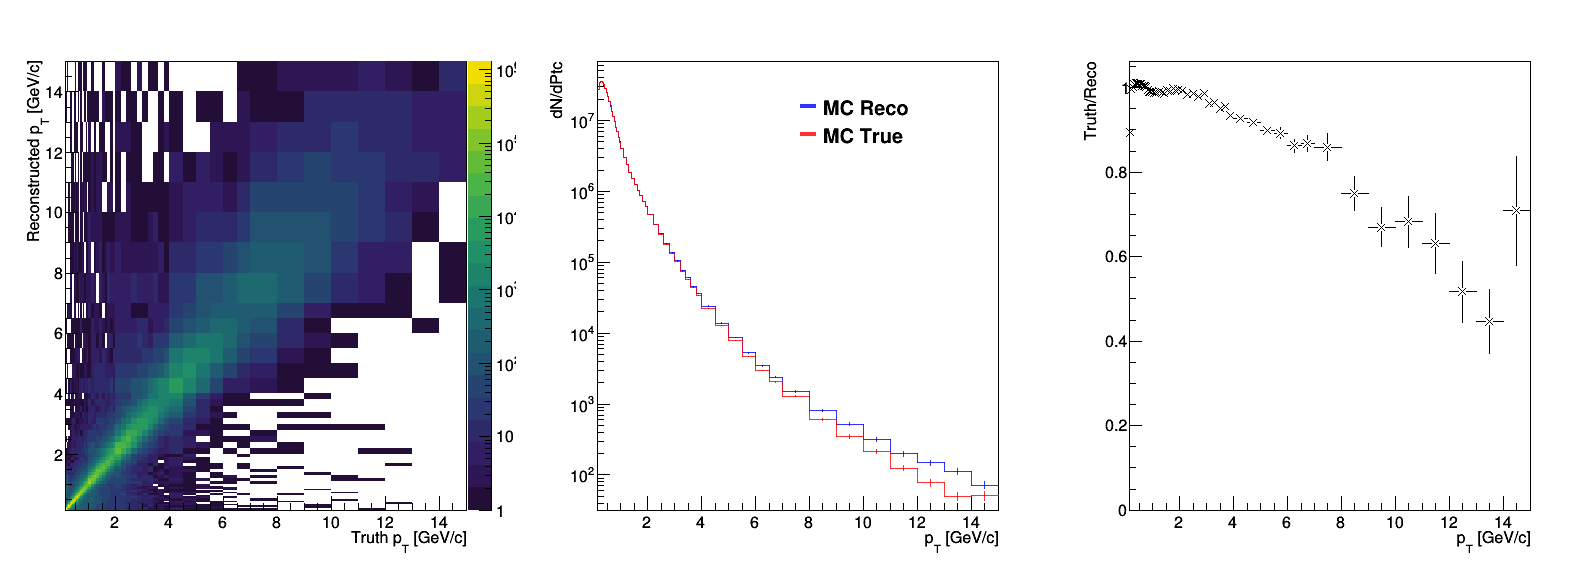

In [23]:
responseMatrix_counts = MCfile.Get("hCorrelation");
responseMatrix_counts.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print responseMatrix_counts.GetBinContent(0,0)
print responseMatrix_counts.GetBinContent(responseMatrix_counts.GetNbinsX()+1,responseMatrix_counts.GetNbinsY()+1)
        
mc_truth_counts = responseMatrix_counts.ProjectionX()
mc_reco_counts = responseMatrix_counts.ProjectionY()


mc_truth_counts.SetLineColorAlpha(2,0.8)
mc_reco_counts.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
#responseMatrix_counts.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

label = Legend("")
label.Add(mc_reco_counts,'MC Reco','L')
label.Add(mc_truth_counts,'MC True','L')
#mc_reco_counts.GetXaxis().SetRangeUser(1,30)
#mc_truth_counts.GetXaxis().SetRangeUser(1,30)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts.GetNbinsX()+1):
    dpt = mc_reco_counts.GetBinWidth(ibin)
    mc_reco_counts.SetBinContent(ibin, mc_reco_counts.GetBinContent(ibin)/dpt)
    mc_truth_counts.SetBinContent(ibin, mc_truth_counts.GetBinContent(ibin)/dpt)
mc_reco_counts.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts.Draw('histe')
mc_truth_counts.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts.Draw('histesame')


label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts = mc_truth_counts.Clone()
ratio_mc_counts.SetMinimum(0.0)
ratio_mc_counts.SetLineColor(1)
ratio_mc_counts.SetMarkerStyle(5)
#ratio_mc_counts.GetXaxis().SetRangeUser(1,30)
ratio_mc_counts.Divide(mc_reco_counts)
ratio_mc_counts.Draw('e')
ratio_mc_counts.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

#for i in range(ratio_mc.GetNbinsX()+1):
#    low = ratio_mc.GetBinLowEdge(i)
#    center =   ratio_mc.GetBinCenter(i)
#    high = ratio_mc.GetBinLowEdge(i+1)
#    content =  ratio_mc.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


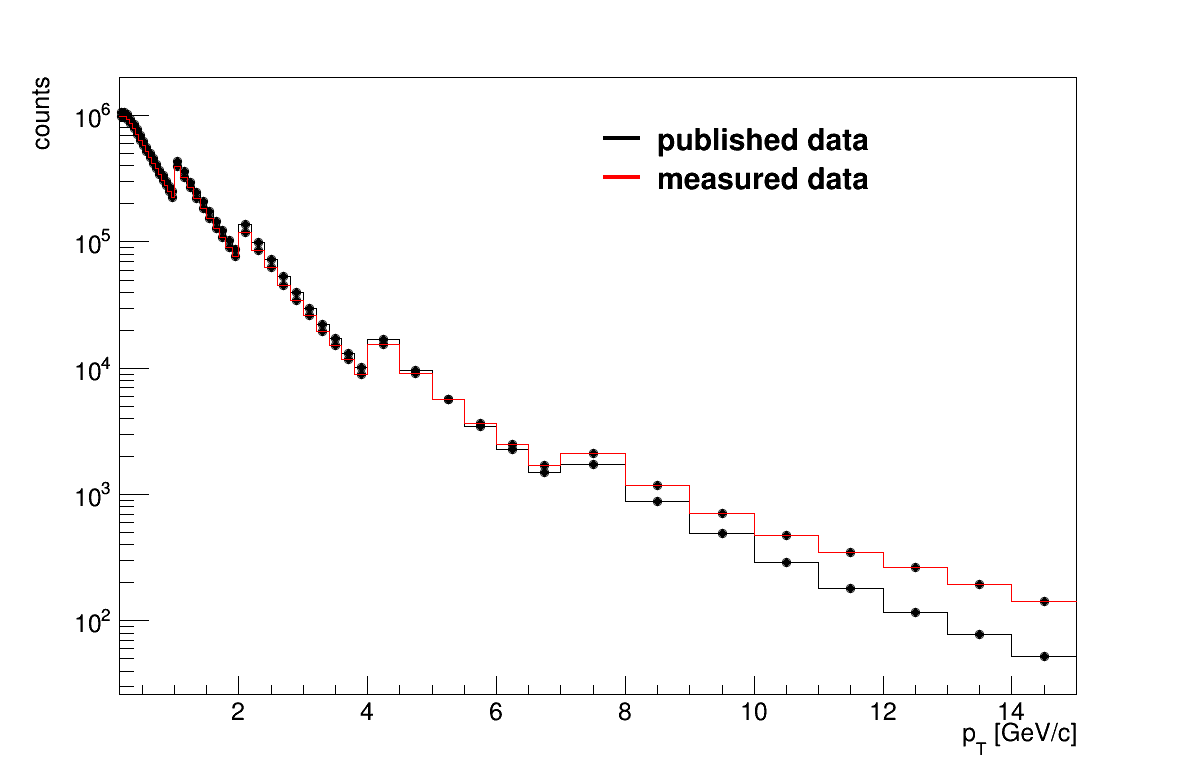

In [15]:
#data.Scale(numEvents)
h.SetLineColor(1)
data.SetLineColor(2)
mc_reco_counts.SetLineColor(3)
#mc_truth_counts.SetLineColor(4)

c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
data.Draw('histesame')
#mc_reco_counts.Draw('histesame')
#mc_truth_counts.Draw('histesame')
c.SetLogy()

label = Legend("")
#label.Add(mc_reco_counts,'MC Reco','L')
#label.Add(mc_truth_counts,'MC True','L')
label.Add(h,'published data','L')
label.Add(data,'measured data','L')
label.Draw(0.5,.87)
c.Draw()

-0.141176470588 	0.00441176470588 	0.15 	0.0502002090216 	0.000149667805789 	0.00298141798025
0.15 	0.175 	0.2 	0.701584160328 	0.000782008875073 	0.00111463302522
0.2 	0.225 	0.25 	0.79414910078 	0.000810680173849 	0.00102081608234
0.25 	0.275 	0.3 	0.811055779457 	0.000818565738407 	0.00100925948516
0.3 	0.325 	0.35 	0.824280560017 	0.000847907749032 	0.0010286640134
0.35 	0.375 	0.4 	0.833784401417 	0.000893938540288 	0.00107214591538
0.4 	0.425 	0.45 	0.841100335121 	0.000953037510818 	0.00113308421246
0.45 	0.475 	0.5 	0.846235156059 	0.00102521420205 	0.0012115003669
0.5 	0.525 	0.55 	0.85052126646 	0.00110250201348 	0.00129626625101
0.55 	0.575 	0.6 	0.853947877884 	0.00120047344451 	0.00140579240912
0.6 	0.625 	0.65 	0.855173885822 	0.00129877906206 	0.0015187309664
0.65 	0.675 	0.7 	0.857244968414 	0.00142181031968 	0.00165858111982
0.7 	0.725 	0.75 	0.858315169811 	0.00155043342421 	0.00180636842822
0.75 	0.775 	0.8 	0.858334481716 	0.00168142805967 	0.00195894269133
0.8 	0.8

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


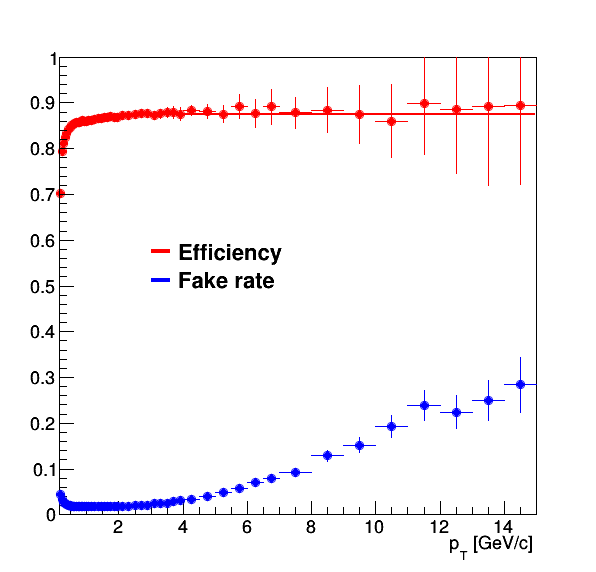

In [9]:
#Get efficiency and fake rate
efficiency = MCfile.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency.Divide(MCfile.Get("hTruth"))
fakerate   = MCfile.Get("FakeRate")

#Plot efficiency and fake rate
efficiency.SetTitle(' ; p_{T} [GeV/c];')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
#efficiency.GetXaxis().SetRangeUser(1,30)
fakerate.SetMarkerStyle(20)
fakerate.SetLineColor(4)
fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
efficiency.Fit('pol0', '', '', 2,20)
efficiency.Draw()
fakerate.Draw('same')

#label = Legend("MC: 13b2_efix_p1")
label = Legend("")
label.Add(efficiency,'Efficiency','L')
label.Add(fakerate,'Fake rate','L')
label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_0GeV15GeV.pdf')
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_1GeV15GeV_lowpt.png')

sum = 0.0
for i in range(efficiency.GetNbinsX()):
    low = efficiency.GetBinLowEdge(i)
    center =   efficiency.GetBinCenter(i)
    high = efficiency.GetBinLowEdge(i+1)
    content =  efficiency.GetBinContent(i)
    error =  efficiency.GetBinError(i)
    print low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content
    #sum += (error/content)**2

print "\n\n"

for i in range(fakerate.GetNbinsX()+1):
    low = fakerate.GetBinLowEdge(i)
    center =   fakerate.GetBinCenter(i)
    high = fakerate.GetBinLowEdge(i+1)
    content =  fakerate.GetBinContent(i)
    print low, '\t', center, '\t', high, '\t',content

In [10]:
for i in range(responseMatrix_counts.GetNbinsX()+2):
    ySliceSum = float(0.0)
    for j in range(responseMatrix_counts.GetNbinsY()+2):
        tempCont = responseMatrix_counts.GetBinContent(i, j)
        ySliceSum += tempCont
    print "ySliceSum = ", ySliceSum, "bin: ", i
    for j in range (responseMatrix_counts.GetNbinsY()+2):
        tempCont = responseMatrix_counts.GetBinContent(i, j)
        newCont = tempCont/ySliceSum
        responseMatrix_counts.SetBinContent(i, j, newCont)
        #print responseMatrix_counts.GetBinContent(i, j), "\t"
    #print "\n"

ySliceSum =  118148.0 bin:  0
ySliceSum =  1369587.0 bin:  1
ySliceSum =  1721724.0 bin:  2
ySliceSum =  1777977.0 bin:  3
ySliceSum =  1724029.0 bin:  4
ySliceSum =  1595293.0 bin:  5
ySliceSum =  1434013.0 bin:  6
ySliceSum =  1257882.0 bin:  7
ySliceSum =  1101300.0 bin:  8
ySliceSum =  938113.0 bin:  9
ySliceSum =  804309.0 bin:  10
ySliceSum =  675143.0 bin:  11
ySliceSum =  569517.0 bin:  12
ySliceSum =  484262.0 bin:  13
ySliceSum =  402436.0 bin:  14
ySliceSum =  344140.0 bin:  15
ySliceSum =  288806.0 bin:  16
ySliceSum =  246510.0 bin:  17
ySliceSum =  397497.0 bin:  18
ySliceSum =  298744.0 bin:  19
ySliceSum =  235685.0 bin:  20
ySliceSum =  185315.0 bin:  21
ySliceSum =  150868.0 bin:  22
ySliceSum =  125443.0 bin:  23
ySliceSum =  102998.0 bin:  24
ySliceSum =  87103.0 bin:  25
ySliceSum =  71945.0 bin:  26
ySliceSum =  60427.0 bin:  27
ySliceSum =  94909.0 bin:  28
ySliceSum =  67905.0 bin:  29
ySliceSum =  50013.0 bin:  30
ySliceSum =  36071.0 bin:  31
ySliceSum =  2682

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


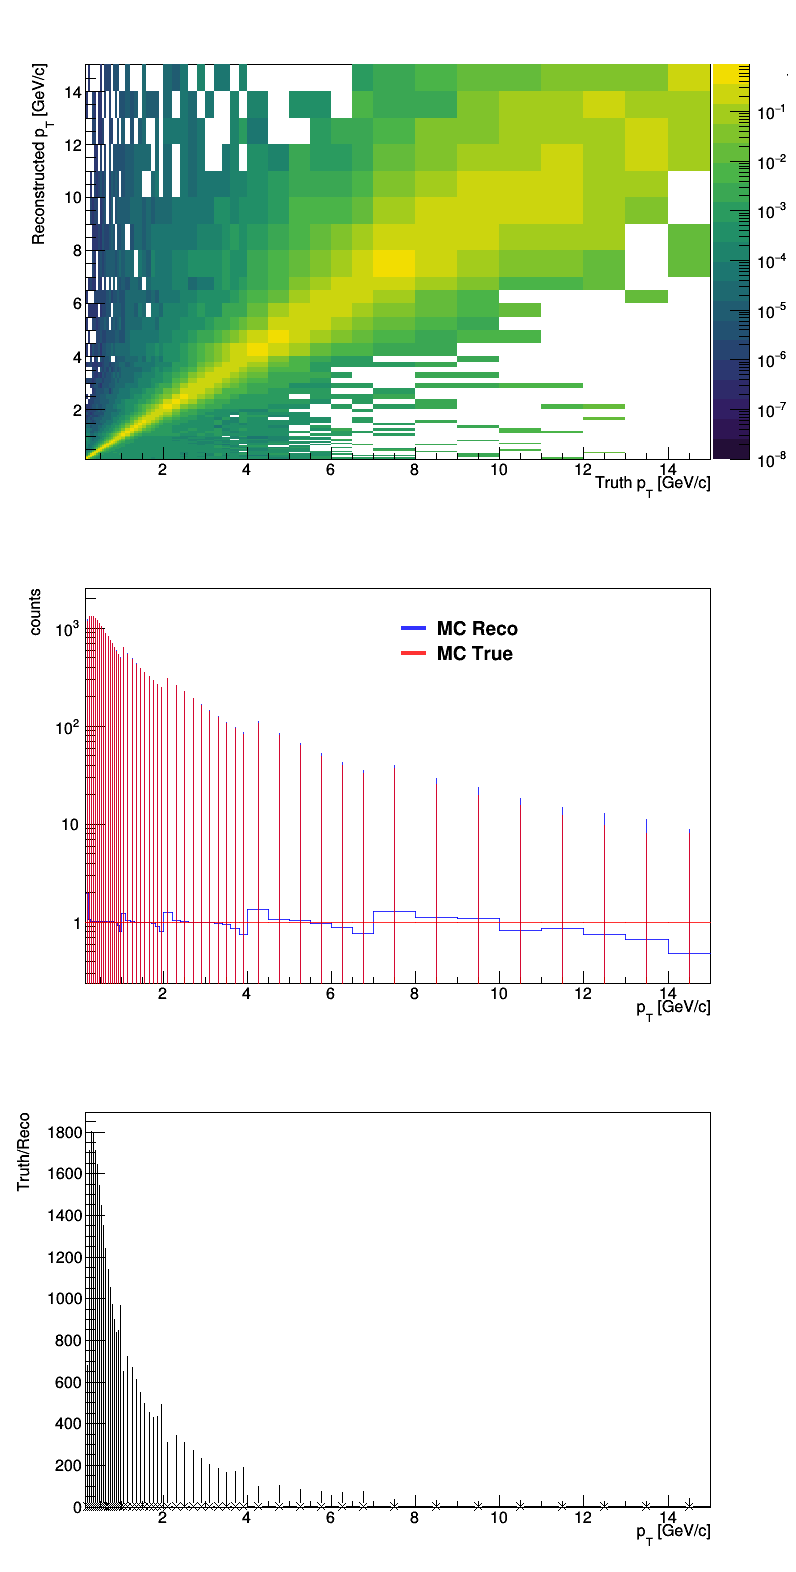

In [11]:
responseMatrix_counts_post = responseMatrix_counts.Clone()



mc_truth_counts_post = responseMatrix_counts.ProjectionX()
mc_reco_counts_post = responseMatrix_counts.ProjectionY()
mc_truth_counts_post.SetLineColorAlpha(2,0.8)
mc_reco_counts_post.SetLineColorAlpha(4,0.8)

c = ROOT.TCanvas('c','c',800,1600)
c.Divide(1,3)
c.cd(1)
responseMatrix_counts.SetMinimum(1e-8)
responseMatrix_counts.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

label = Legend("")
label.Add(mc_reco_counts_post,'MC Reco','L')
label.Add(mc_truth_counts_post,'MC True','L')
#mc_reco_counts.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts.GetXaxis().SetRangeUser(1,15)
mc_reco_counts_post.SetTitle('; p_{T} [GeV/c]; counts')
mc_reco_counts_post.Draw('histe')
mc_truth_counts_post.SetTitle('; p_{T} [GeV/c]; counts')
mc_truth_counts_post.Draw('histesame')

ratio_mc_counts_post = mc_truth_counts_post.Clone()
ratio_mc_counts_post.Divide(mc_reco_counts_post)

label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts_post.SetMinimum(0.0)
ratio_mc_counts_post.SetLineColor(1)
ratio_mc_counts_post.SetMarkerStyle(5)
#ratio_mc_counts.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts_post.Draw('e')
ratio_mc_counts_post.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

### Get and plot efficiency and fake rate

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


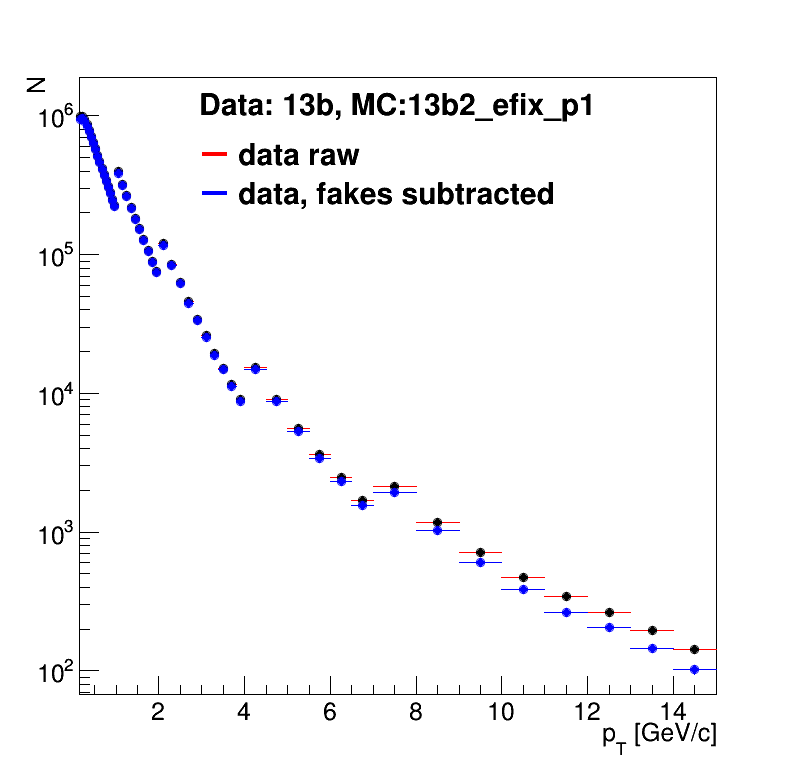

In [12]:
data_bkgsub = data.Clone()
for i in range(data_bkgsub.GetNbinsX()+1):
    #width = 
    tempContent = data.GetBinContent(i)
    bkg = tempContent*fakerate.GetBinContent(i)
    data_bkgsub.SetBinContent(i,data.GetBinContent(i)-bkg)

c = ROOT.TCanvas('c','c',800,800)
#data.GetXaxis().SetRangeUser(1,30)
data.Draw('e')
data_bkgsub.SetLineColor(ROOT.kBlue)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_bkgsub.SetMarkerStyle(20)

data_bkgsub.Draw('esame')
ROOT.gPad.SetLogy()
label = Legend("Data: 13b, MC:13b2_efix_p1")
label.Add(data,'data raw','L')
label.Add(data_bkgsub,'data, fakes subtracted','L')
label.Draw(.25,.85)
c.Draw()
#c.SaveAs('FakeRate_sub_tracking_its_MBMC_0GeV15GeV.pdf')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


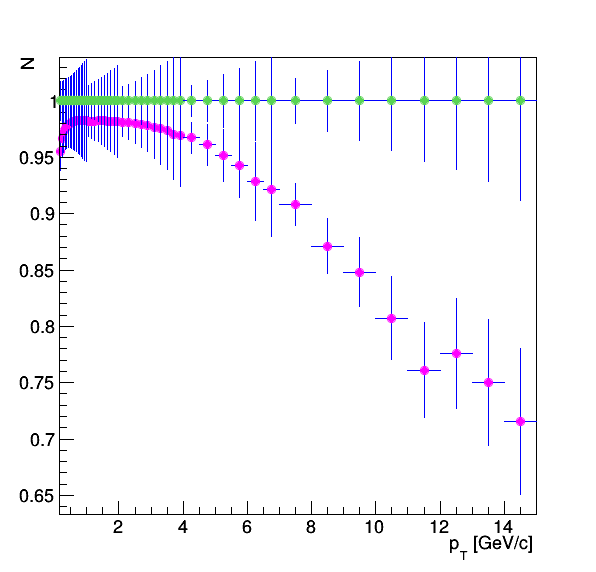

In [13]:
ratio_fkrate = data_bkgsub.Clone()
ratio_fkrate.Divide(data)
ratio_fkrate.SetMarkerColor(6)
one = ratio_fkrate.Clone()
one.Add(fakerate)
one.SetMarkerColor(8)

c = ROOT.TCanvas('c','c',600,600)
ratio_fkrate.Draw('e')
fakerate.Draw('same')
one.Draw('same')


c.Draw()

# Refolding

In [14]:
##refolding the distribution:
def applyEfficiencyUnCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.GetPoint(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)*eff)
        print histo.GetBinContent(i)*eff, '\t', i
        histo_corrected.SetBinError(i,histo.GetBinError(i)*eff)
    return histo_corrected
        

# h=published data 
h_wEff = applyEfficiencyUnCorrection(h)
h_wEff.SetLineColor(ROOT.kRed)
N = h_wEff.GetNbinsX()
#print N
#print h_wEff.GetBinContent(0)

data_refolded= h_wEff.Clone()#data_unfolded['SVD9'].Clone()
data_refolded.SetLineColorAlpha(4,0.5)

for ireco in range(N+2):
    temp = 0
    for itruth in range(N+2):
       #print responseMatrix_counts.GetBinContent(itruth,ireco)
        #print data_unfolded['SVD'].GetBinContent(itruth)
        temp += responseMatrix_counts.GetBinContent(itruth,ireco)*h_wEff.GetBinContent(itruth)
    data_refolded.SetBinContent(ireco, temp)

#data_refolded.Scale(h_wEff.Integral()/data_refolded.Integral())
print h.Integral()
print h_wEff.Integral()
print data_refolded.Integral()


746726.540748 	1
845247.433447 	2
829521.643989 	3
774506.99661 	4
714106.271463 	5
648334.910136 	6
586852.497883 	7
530418.072621 	8
478589.484127 	9
430922.254687 	10
389909.783634 	11
351856.486884 	12
318319.538646 	13
287878.712032 	14
261262.246926 	15
236761.324169 	16
214623.500374 	17
372222.079701 	18
309118.052676 	19
257346.327108 	20
214424.583335 	21
180225.955458 	22
150710.36593 	23
126430.481187 	24
107011.151772 	25
89607.1142537 	26
75868.8932034 	27
119659.304844 	28
87076.8522908 	29
63657.2420426 	30
46869.7122237 	31
34837.5123598 	32
26007.1152443 	33
19597.9802505 	34
15063.4496711 	35
11553.1697943 	36
8954.85099836 	37
14983.4478597 	38
8428.49460898 	39
4986.14719318 	40
3108.977256 	41
1983.50653285 	42
1341.56893079 	43
1519.38110437 	44
779.06879719 	45
426.935713508 	46
248.141708229 	47
161.517968497 	48
102.295873454 	49
69.7139052146 	50
47.020177318 	51
13214536.9851
11000266.1227
10999700.7974


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


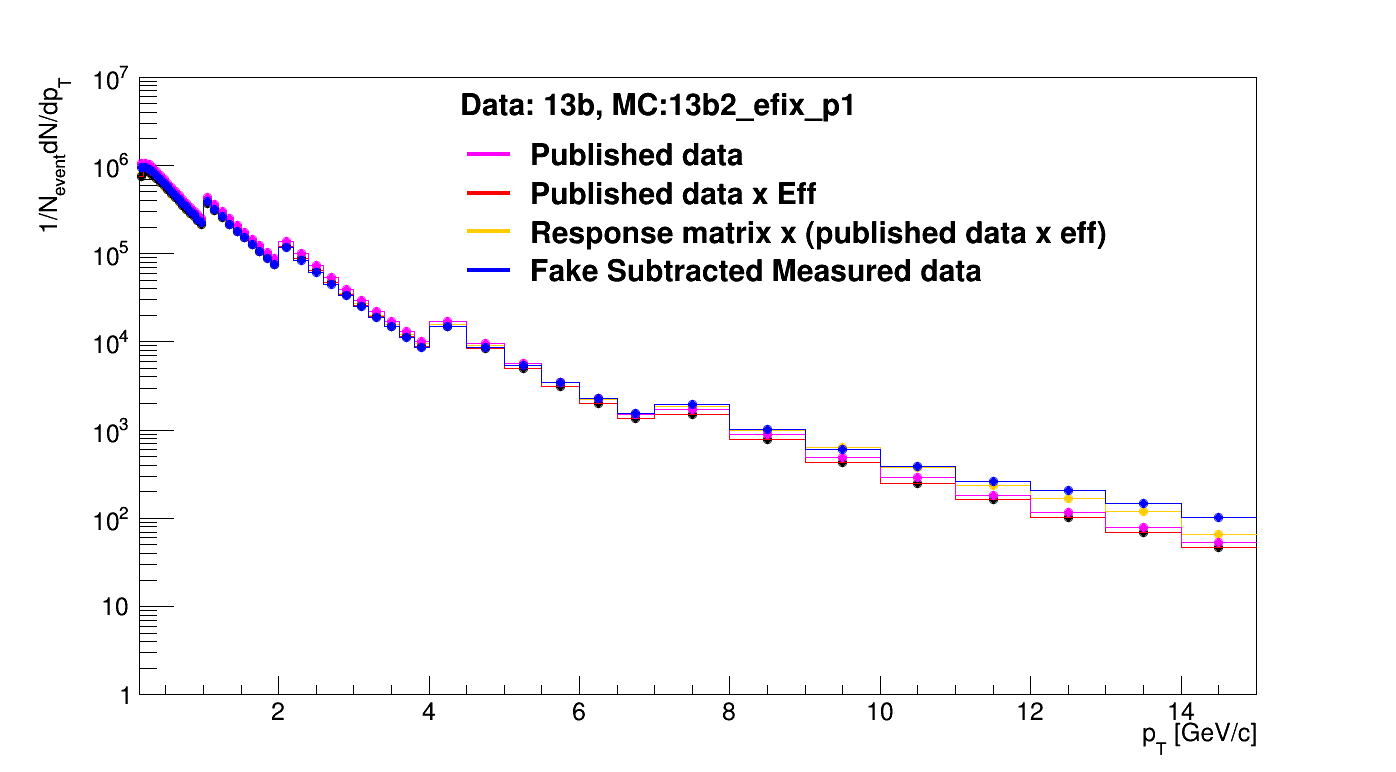

In [15]:
#plotting the refolded results
c= ROOT.TCanvas('c','c',1400,800)
h.SetLineColor(ROOT.kMagenta)
data_bkgsub.SetLineColor(ROOT.kBlue)
data_refolded.SetLineColor(ROOT.kOrange)
h.SetMarkerColor(ROOT.kMagenta)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_refolded.SetMarkerColor(ROOT.kOrange)

data_refolded.SetTitle(";p_{T} [GeV/c];1/N_{event}dN/dp_{T}")

#data_refolded.GetXaxis().SetRangeUser(1,15)
data_refolded.GetYaxis().SetRangeUser(1,1e7)
data_refolded.Draw('histe')
h_wEff.Draw('histesame')
h.Draw('histesame')
data_bkgsub.Draw('histesame')


label = Legend("Data: 13b, MC:13b2_efix_p1")
label.Add(h,'Published data','L')
label.Add(h_wEff,'Published data x Eff','L')
label.Add(data_refolded,'Response matrix x (published data x eff)','L')
label.Add(data_bkgsub,'Fake Subtracted Measured data','L')
label.Draw(.33,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('refolding_pPb_its_MBMC_0GeV15GeV.pdf')

In [16]:
divBin_data_bkgsub = data_bkgsub.Clone()
divBin_data_refolded = data_refolded.Clone()
divBin_h_wEff = h_wEff.Clone()
divBin_h = h.Clone()

for ibin in range(1, divBin_data_bkgsub.GetNbinsX()+1):
    dpt = divBin_data_bkgsub.GetBinWidth(ibin)
    divBin_data_bkgsub.SetBinContent(ibin, divBin_data_bkgsub.GetBinContent(ibin)/dpt)
    divBin_data_refolded.SetBinContent(ibin, divBin_data_refolded.GetBinContent(ibin)/dpt)
    divBin_h_wEff.SetBinContent(ibin, divBin_h_wEff.GetBinContent(ibin)/dpt)
    divBin_h.SetBinContent(ibin, divBin_h.GetBinContent(ibin)/dpt)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file refolding_pPb_its_MBMC_0GeV15GeV_dNdpt.pdf has been created


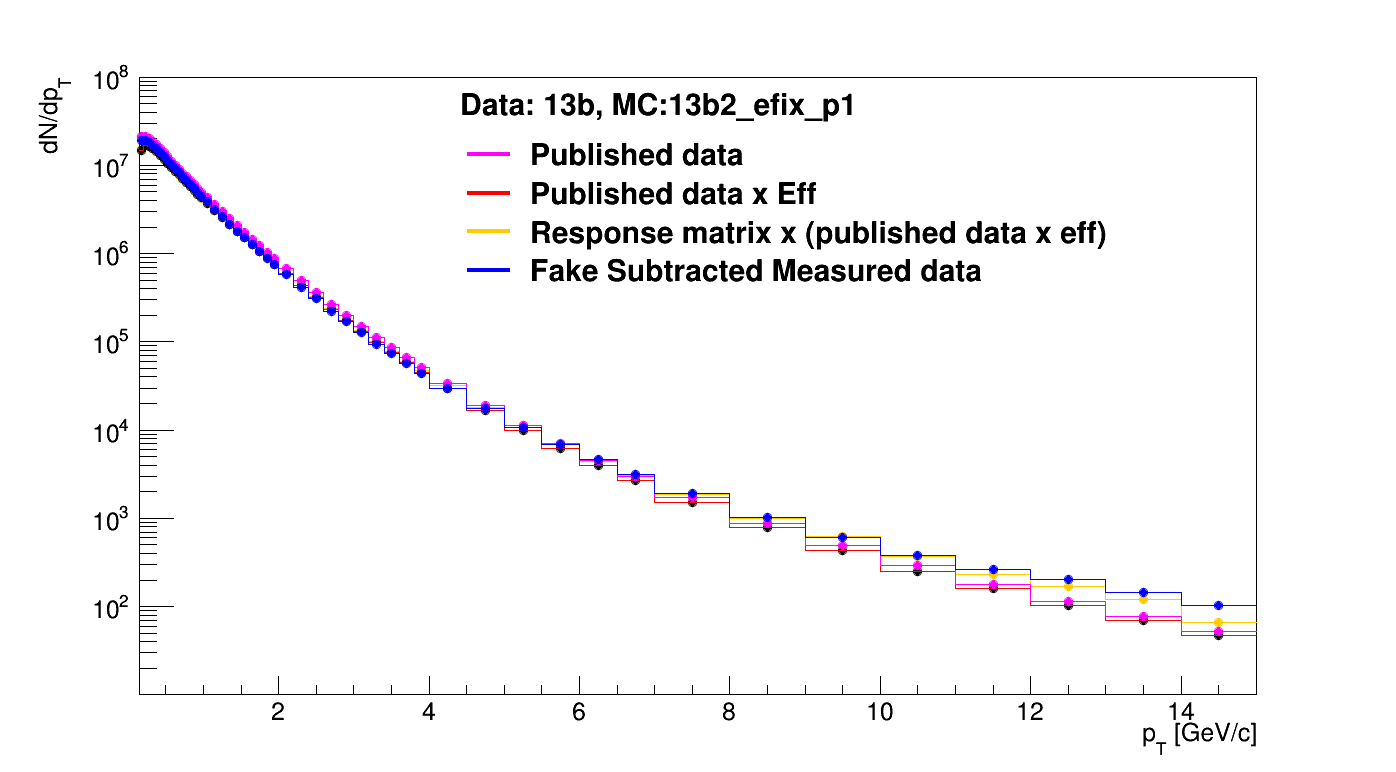

In [21]:
c= ROOT.TCanvas('c','c',1400,800)
#h.SetLineColor(ROOT.kMagenta)
#data_bkgsub.SetLineColor(ROOT.kBlue)
#data_refolded.SetLineColor(ROOT.kOrange)
#h.SetMarkerColor(ROOT.kMagenta)
#data_bkgsub.SetMarkerColor(ROOT.kBlue)
#data_refolded.SetMarkerColor(ROOT.kOrange)

divBin_data_refolded.SetTitle(";p_{T} [GeV/c];dN/dp_{T}")

#data_refolded.GetXaxis().SetRangeUser(1,15)
divBin_data_refolded.GetYaxis().SetRangeUser(10,1e8)
divBin_data_refolded.Draw('histe')
divBin_h_wEff.Draw('histesame')
divBin_h.Draw('histesame')
divBin_data_bkgsub.Draw('histesame')


label = Legend("Data: 13b, MC:13b2_efix_p1")
label.Add(divBin_h,'Published data','L')
label.Add(divBin_h_wEff,'Published data x Eff','L')
label.Add(divBin_data_refolded,'Response matrix x (published data x eff)','L')
label.Add(divBin_data_bkgsub,'Fake Subtracted Measured data','L')
label.Draw(.33,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('refolding_pPb_its_MBMC_0GeV15GeV_dNdpt.pdf')

In [56]:
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_refolded = data_refolded.Clone()
ratio_h_wEff = h_wEff.Clone()
ratio_h = h.Clone()

ratio_data_bkgsub.Divide(ratio_h)
ratio_data_refolded.Divide(ratio_h)
ratio_h_wEff.Divide(ratio_h)
ratio_h.Divide(ratio_h)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


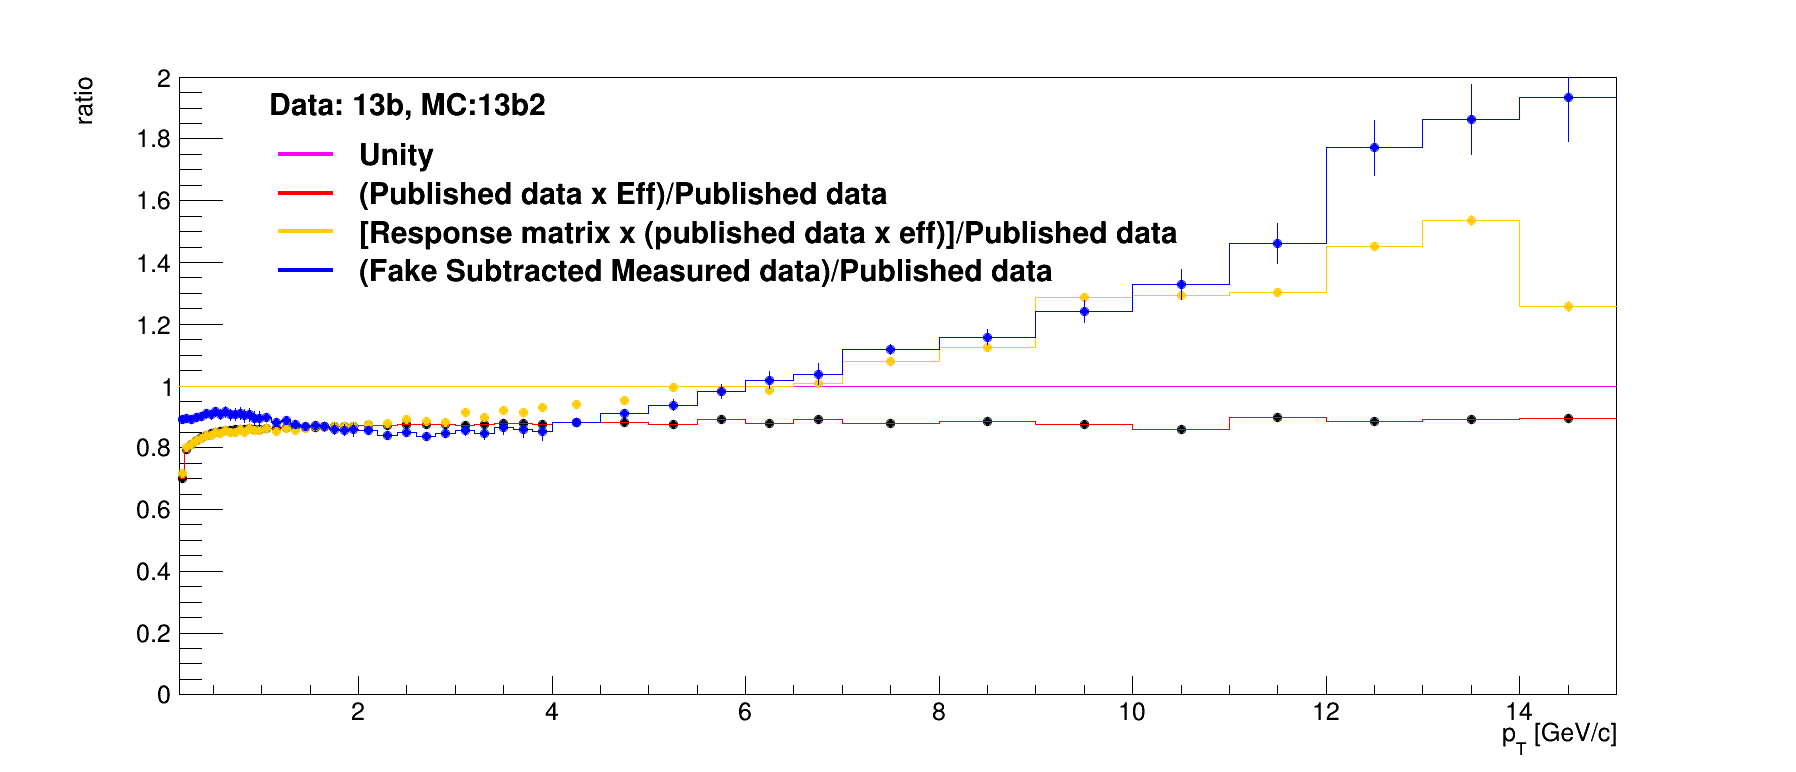

In [57]:
c= ROOT.TCanvas('c','c',1800,800)

ratio_h.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_h.SetMaximum(2.0)
ratio_h.SetMinimum(0.0)
#ratio_h.GetXaxis().SetRangeUser(1,30)


ratio_h.Draw('hist')
ratio_h_wEff.Draw('histesame')
ratio_data_refolded.Draw('histesame')
ratio_data_bkgsub.Draw('histesame')

label = Legend("Data: 13b, MC:13b2")
label.Add(ratio_h,'Unity','L')
label.Add(ratio_h_wEff,'(Published data x Eff)/Published data','L')
label.Add(ratio_data_refolded,'[Response matrix x (published data x eff)]/Published data','L')
label.Add(ratio_data_bkgsub,'(Fake Subtracted Measured data)/Published data','L')
label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_1GeV20GeV_errors.pdf')
#c.SaveAs('ratio_pink_pPb_13b2.png')

In [58]:
ratio_refold_pub = h_wEff.Clone()
ratio_refold_pub.Divide(data_refolded)

ratio_refold_data_sub = data_bkgsub.Clone()
ratio_refold_data_sub.Divide(data_refolded)
#ratio_refold_data_sub.SetLineColor(ROOT.kBlue)
#ratio_refold_data_sub.SetMarkerColor(ROOT.kBlue)

ratio_refold_data = data.Clone()
ratio_refold_data.Divide(data_refolded)

#addFakes = ratio_refold_data_sub.Clone()
#addFakes.Add(fakerate)

print ratio_refold_pub.Integral()

47.772713244


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


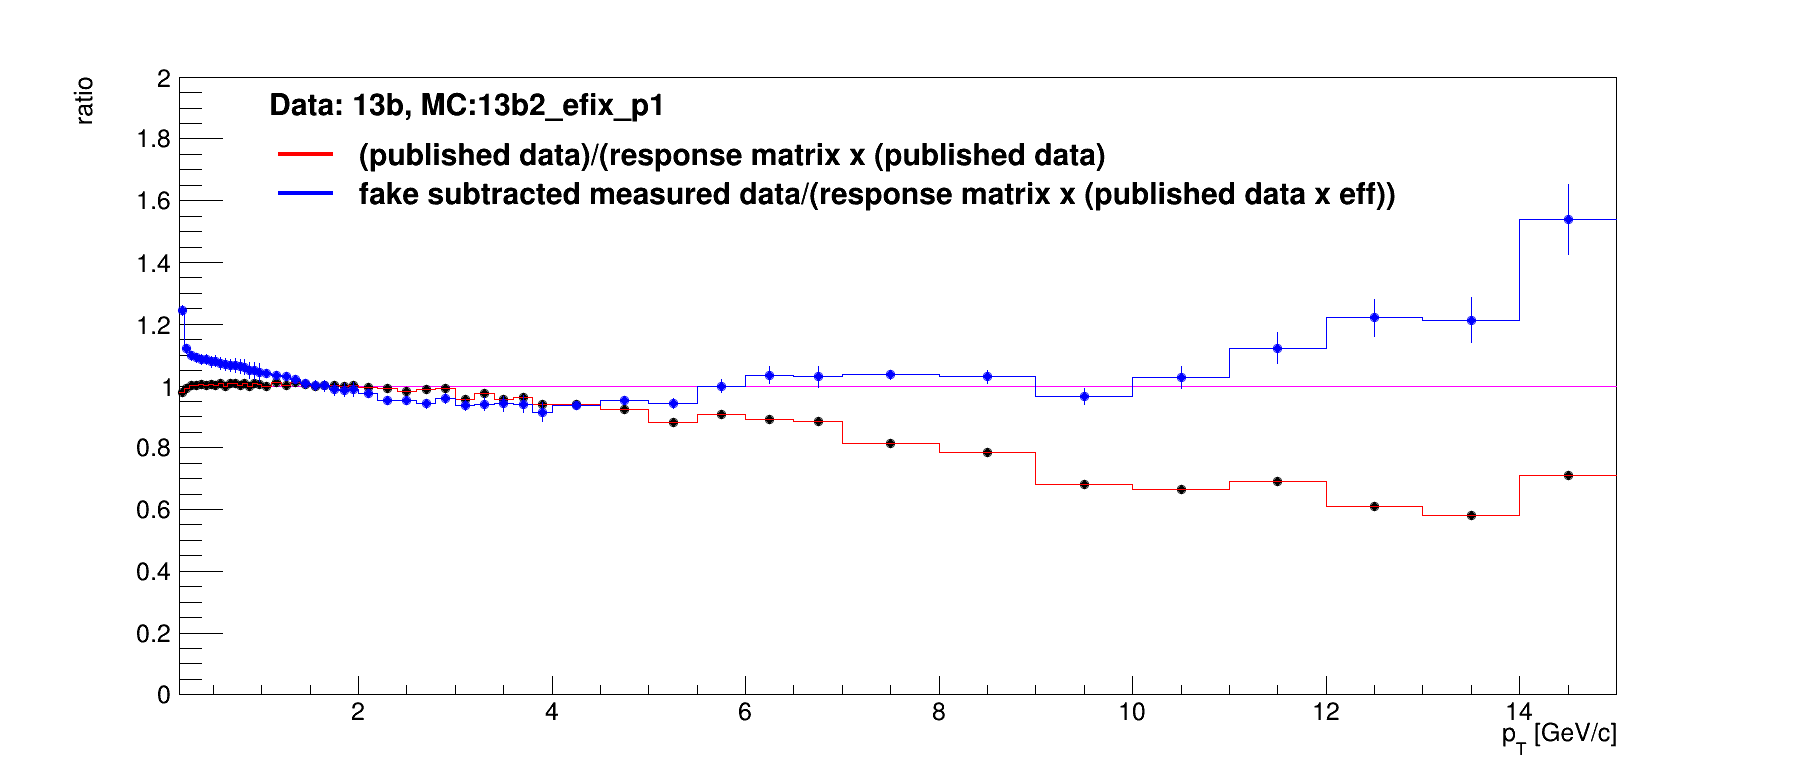

In [59]:
c= ROOT.TCanvas('c','c',1800,800)

#addFakes.SetLineColor(8)
#addFakes.SetMarkerColor(8)

ratio_unity = h.Clone()
ratio_unity.Divide(h)
ratio_unity.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
#ratio_refold_unfoldedSVD.Draw('histsame')
#ratio_refold_data.Draw('histesame')
#ratio_unity.GetXaxis().SetRangeUser(1,30)
ratio_unity.Draw('hist')
ratio_refold_pub.Draw('histesame')
ratio_refold_data_sub.Draw('histesame')
#addFakes.Draw('histesame')

label = Legend("Data: 13b, MC:13b2_efix_p1")
#label.Add(ratio_refold_data,'raw data','L')
label.Add(ratio_refold_pub,'(published data)/(response matrix x (published data)','L')
label.Add(ratio_refold_data_sub,'fake subtracted measured data/(response matrix x (published data x eff))','L')
#label.Add(addFakes, "addFakes", 'L')
label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pPb_its_MBMC_0GeV15GeV_errors.pdf')
#c.SaveAs('ratio_refolding_pPb_its_usingCounts_data_publishedDataBinning.png')

# Response matrix plotting

<ROOT.TH2F object ("hCorrelation_cor") at 0x78bfc00>
<ROOT.TH1D object ("hCorrelation_cor_px") at 0x7923410>


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file reWeighted_response_pPb.png has been created


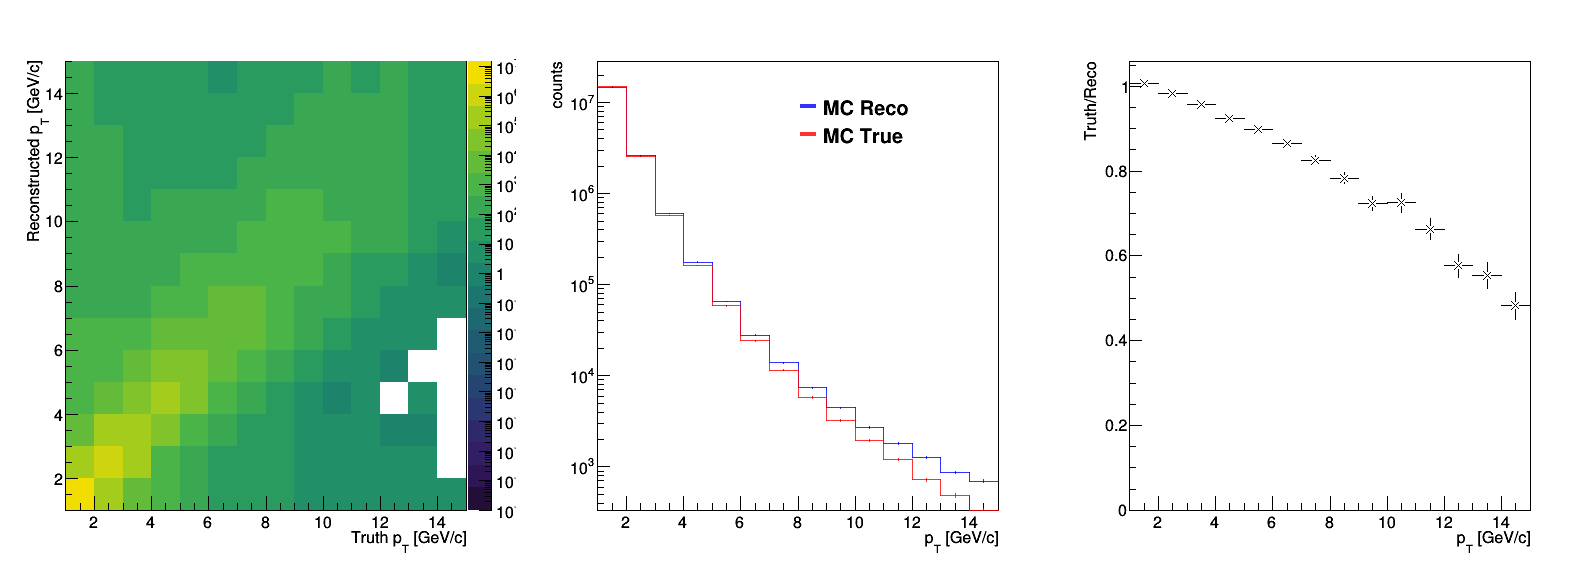

In [19]:
responseMatrix = MCfile.Get("hCorrelation_cor");
print responseMatrix
#responseMatrix.Rebin2D(2,2)
responseMatrix.ClearUnderflowAndOverflow()
responseMatrix.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')
#responseMatrix.SetMinimum(1e-7)
        

mc_truth = responseMatrix.ProjectionX()
mc_reco = responseMatrix.ProjectionY()

print mc_truth

for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
mc_truth.Sumw2()
mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
responseMatrix.SetMinimum(1e-8)
responseMatrix.GetXaxis().SetRangeUser(1,15)
responseMatrix.GetYaxis().SetRangeUser(1,15)
responseMatrix.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')
mc_reco.GetXaxis().SetRangeUser(1,15)
mc_truth.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')
mc_reco.SetTitle('; p_{T} [GeV/c]; counts')
mc_reco.Draw('histe')
mc_truth.SetTitle('; p_{T} [GeV/c]; counts')
mc_truth.Draw('histesame')


label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc = mc_truth.Clone()
ratio_mc.SetMinimum(0.0)
ratio_mc.SetLineColor(1)
ratio_mc.SetMarkerStyle(5)
ratio_mc.GetXaxis().SetRangeUser(1,15)
ratio_mc.Divide(mc_reco)
ratio_mc.Draw('e')
ratio_mc.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_1GeV15GeV.png')
c.SaveAs('reWeighted_response_pPb.png')

#for i in range(ratio_mc.GetNbinsX()+1):
#    low = ratio_mc.GetBinLowEdge(i)
#    center =   ratio_mc.GetBinCenter(i)
#    high = ratio_mc.GetBinLowEdge(i+1)
#    content =  ratio_mc.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content